Рогович Татьяна


## Разведывательный анализ данных (EDA)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

### Что такое разведывательный анализ данных или Exploratory Data Analysis (EDA?)

Разведывательный анализ данных помогает нам изучить данные, обработать пропущенные значения, убедиться, что данные корректно выглядят и в них нет ошибок, выбрать методы для обработки данных (например, стандартизация или OneHotEncoder), сделать первичный отбор признаков для модели.

По сути это работа с дескриптивными статистиками и визуализацией переменных

### Главные методы:

**1. Одномерный анализ **

Распределения и дескриптивные статистики для каждой переменной.

**2. Двумерный анализ **

Исследуем переменные попарно (зависимые и независимые переменные друг с другом, независимые переменные при подозрение на мультиколлинеарностью).

**3. Снижение размерности **

Поиск и выделение признаков, которые отвечают за наибольшую вариативных в данных. 



### 4 цели EDA

* Обнаружить паттерны
* Заметить аномалии
* Сформулировать гипотезы
* Проверить предположения

### Что исследуем во время EDA?

* Тренды
* Распределения
* Центральные тенденции и разброс
* Выбросы
* Корреляции
* Проверяем гипотезы
* Визуально исследуем данные

Сегодня мы работаем с достаточно известным набором данных House Prices Competition. 

Подробное описание данных и переменных по ссылке:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/house_data.txt')

In [14]:
data.shape

(1460, 81)

Мы работает с частью данных, которые в соревновании применяются для тренировки модели. Всего 1460 наблюдений и 81 признак, из которых 36 количественных, 43 категориальных + id + целевая переменная SalePrice

Количественные признаки: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Категориальные признаки: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilitif

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [17]:
data.iloc[100:125]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
105,106,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,250000
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
107,108,20,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Partial,115000
108,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
109,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000


In [18]:
data.info() # изучаем данные - пропущенные значения и типы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
# выделяем количественные и категориальные переменные
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[np.object])

In [8]:
numeric_features.iloc[:, :18].describe() # смотрим описательные статистики первых 18 количественных переменных

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000


In [21]:
numeric_features.iloc[:, 18:].describe() # смотрим описательные статистики первых 18 количественных переменных

,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Количественные переменные: распределения

Две важные характеристики нормального распределения - смещение (skew) и эксцесс (kurtosis). Для этого можно строить распределения, а можно вывести соответствующие статистики, чтобы понять, в какую сторону смещено распределение переменной относительно нормального и насколько большие хвосты (tails) имеет распределение.

![](https://miro.medium.com/max/1500/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

* Нормальное симметричное распределение имеет смещение между - 0.5 и 0.5
* От - 1 до - 0.5 - умеренное негативное смещение.
* Меньше -1 - высокое смещение. И в обратную сторону для позитивных значений.




In [22]:
numeric_features.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

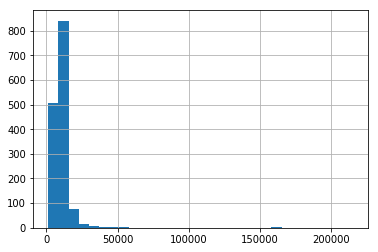

In [23]:
data.LotArea.hist(bins = 30) # Смотрим распределения переменных с большим смещением

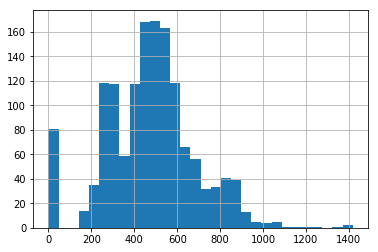

In [24]:
data.GarageArea.hist(bins = 30) # смотрим распределение, у которого почти не должно быть смещения, судя по статистике

Значение эксцесса по сути показывает нам, сколько выбросов, есть в данных.

![](https://miro.medium.com/max/928/1*Nqu07THa7APRTOF7kaVr5Q.jpeg)


* Нормальное распределение имеет kurtosis около 0. Можем оценить количество выбросов по характеристикам z-распределения
![](https://study.com/cimages/multimages/16/empirical_rule.png)

* Значение больше 0 - распределение островершнинное (leptokurtic), значит в хвостах распределения много значений (= много выбросов)
* Значение меньше 0 - распределение с отрицательным эксцессом (platykurtic), в таком распределении мало или нет выбросов.


Подробнее про смещение и эксцесс можно прочитать [здесь на английском](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa).

In [25]:
numeric_features.kurtosis()

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

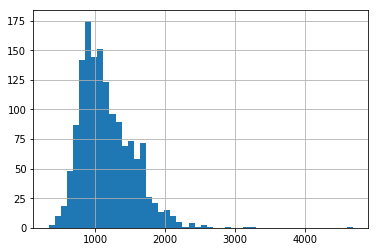

In [26]:
data['1stFlrSF'].hist(bins = 50) # смотрим распределение с kurtosis больше 5

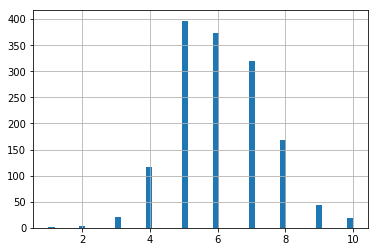

In [27]:
data['OverallQual'].hist(bins = 50) # смотрим распределение, kurtosis которого, близок к нулю

Отдельно всегда стоит изучить целевую переменную, которую собираемся предсказывать. В этом случае это цена дома.

In [28]:
y = data['SalePrice'] # выделеяем целевую переменную в вектор y

1.8828757597682129
6.536281860064529


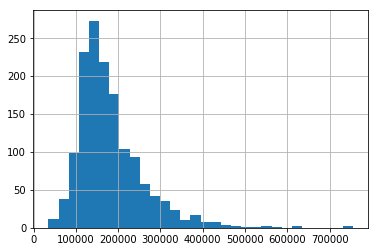

In [29]:
y.hist(bins = 30) # строим распределение
print(y.skew())
print(y.kurtosis())

EDA можно проводить только методами pandas и matplotlib, но библиотека seaborn умеет немного больше. Например, мы можем посмотреть, как выглядит наше распределение относительно стандартных форм (например, нормального и лог-нормального).

C:\Users\rogov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rogov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


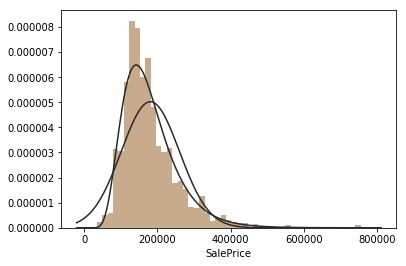

In [30]:
sns.distplot(y, kde=False, fit=st.norm)
sns.distplot(y, kde=False, fit=st.lognorm)

Кстати, вот так можем построить два отдельных графика, инициировав два отдельных объекта

C:\Users\rogov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rogov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


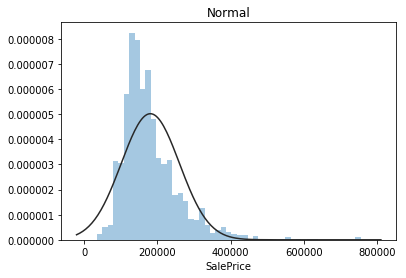

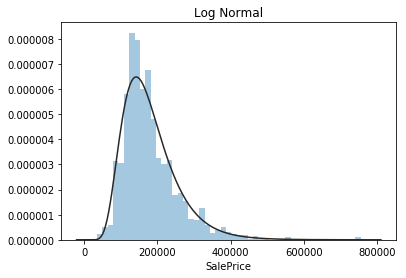

In [31]:
plt.figure(); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Мы видим, что наше распределение больше соответствует логарифмическому. Очень часто мы хотим нормировать такое распределение (могут быстрее сходиться алгоритмы, линейные модели в принципе предпологают, что переменные должны быть распределены нормально, корреляция легче интерпретируется и т.д.)

Давайте посмотрим, как будет выглядеть график цены, после применения лог-функции к нашему вектору.

0.12133506220520406
0.8095319958036296


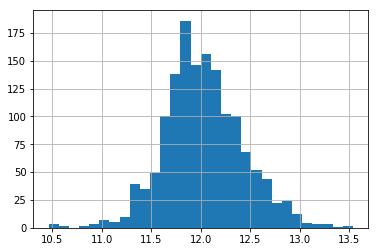

In [32]:
np.log(y).hist(bins = 30) # строим распределение
print(np.log(y).skew())
print(np.log(y).kurtosis())

## Матрицы корреляции

Окей, вроде разобрались с одномерными распределениями. Кстати, изучая распределения можно как раз увидеть аномальные значения, решить, что с ними делать. Следующий шаг - это изучение зависимостей в данных.
Для этого обычно используют тепловую карту корреляций, попарные графики и графики рассеяния.

Для начала найдем коэффиценты попарных корреляций между количественными переменными.

[Подробнее про корреляцию](http://statistica.ru/theory/koeffitsient-korrelyatsii/)


In [12]:
correlation = numeric_features.corr()
correlation.head() # получаем датафрейм, где на пересечении рядов и колонок коэффиценты корреляции Пирсона для этих пар 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [34]:
print(correlation['SalePrice'].sort_values(ascending = False),'\n') # выводим коэффиценты попарной корреляции с SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

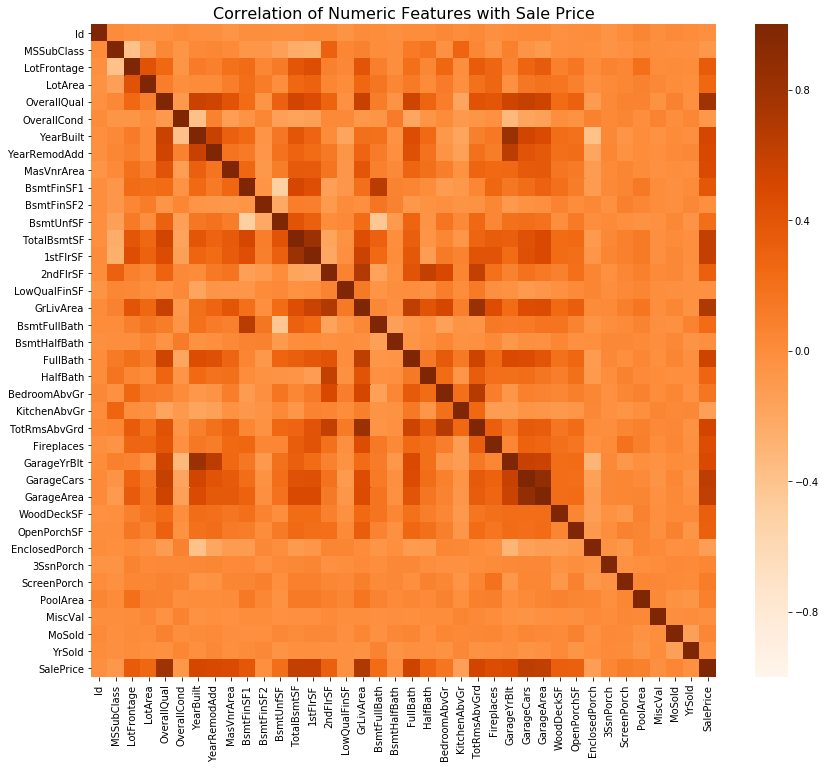

In [23]:
fig , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price', size=16)

sns.heatmap(correlation, vmax=1.0, vmin = -1, cmap='Oranges')

На таком графике можно увидеть признаки, которые сильно коррелируют с целевой переменной, а значит обладают большим предсказательным потенциалом. А также найти переменные, которые сильно коррелируют между собой, и избавиться от части из них в финальной модели. Здесь нас интересуют значения ближе к - 1 и 1.


Мы сразу видим, что есть два кластера с потенциальной мультиколлинеарностью (наличие линейной зависимости между объясняющими переменными (факторами) регрессионной модели) - 'TotalBsmtSF' и '1stFlrSF', и переменные 'GarageX'.

Касаемо 'SalePrice', мы видим, что 'GrLivArea' и 'OverallQual' сильнее всего коррелируют с ценой. Давайте попробуем рассмотреть наши данные подбробнее.

Для начала отфильтруем по индексу 10 топ-корреляций с ценой (мы берем 11, потому что тут еще включается корреляция переменной самой с собой.)

In [14]:
correlation['SalePrice'].sort_values(ascending = False).head(11).index # так мы уже умеем это делать

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [15]:
correlation.nlargest(11,'SalePrice')['SalePrice'].index # альтернативный вариант

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [16]:
cols = correlation.nlargest(11,'SalePrice')['SalePrice'].index # сохраняем интересующие нас колонки для фильтрации

In [20]:
correlation.loc[cols, cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


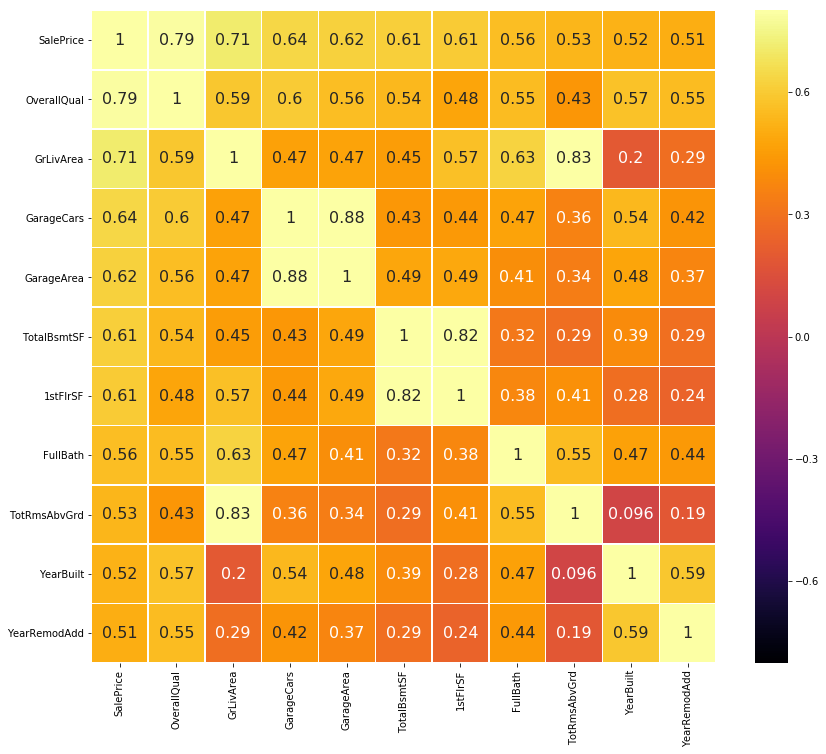

In [26]:
fig , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation.loc[cols, cols], vmax=0.8, vmin = -0.8, linewidths=0.5, 
            annot=True, cmap='inferno', linecolor="white", xticklabels = cols.values,
            annot_kws = {'size':16}, yticklabels = cols.values) #kwargs

In [28]:
fig.savefig('correlation.pdf')

Из такой приближенной тепловой карты, мы видим, что переменные, которые мы подозревали, действительно коррелируют между собой. И что цена действительно сильнее всего связана с  'GrLivArea' и 'OverallQual'

### Промежуточные выводы

* 'OverallQual' и 'GrLivArea' сильно коррелируют с  'SalePrice'.
* 'GarageCars' и 'GarageArea' сильно коррелируют между собой. Что логично, потому что количество машин, помещающихся в гараж, по сути фукнция площади гаража. Для будущей модели мы можем использовать одну переменную из двух (например, ту, которая сильнее коррелирует с ценой)
* 'TotalBsmtSF' и '1stFloor' тоже выглядят близнецами.
* Как и 'TotRmsAbvGrd' и 'GrLivArea'.

## Попарные визуализации
С помощью матрицы корреляций мы нашли переменные, которые сильнее всего коррелируют с ценой дома. Теперь с помощью попарных графиков, мы можем лучше изучить эти взаимосвязи.
Для начала удалим по переменной из пар, где мы обнаружили мультиколлинеарность.

In [29]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [30]:
new_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

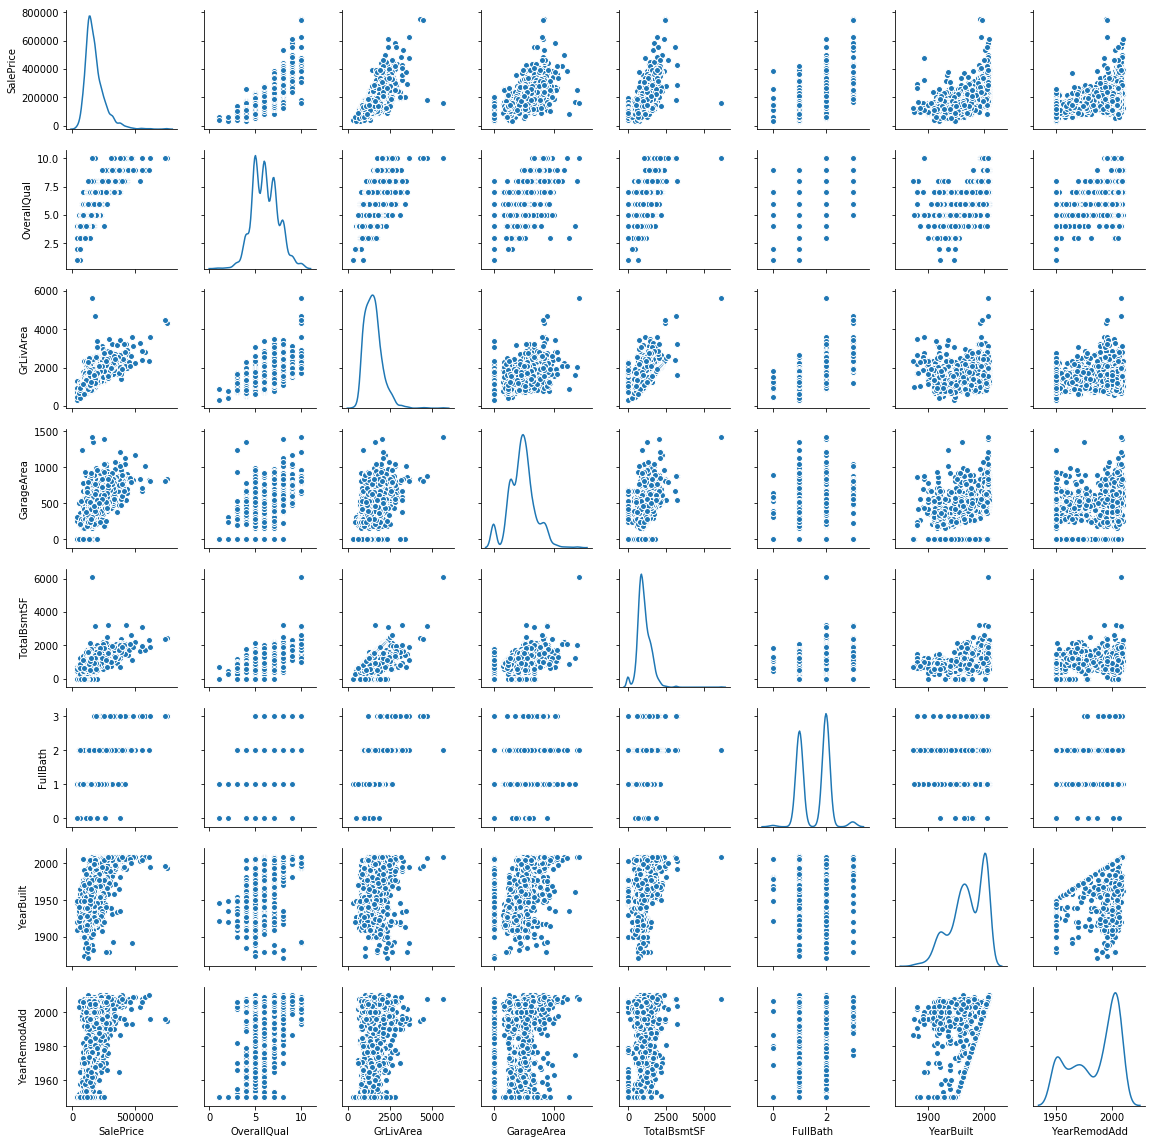

In [31]:
sns.pairplot(data[new_cols],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Кстати, выше я уже упоминала, что один из кейсов для лог-нормирования распределение - оценка взаимосвязи в графиках рассеяния. Давайте посмотрим, как это влияет.

In [43]:
data['logSalePrice'] = np.log(data['SalePrice']) # создаем новую переменную с логарифмом цены
new_cols_log = ['logSalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

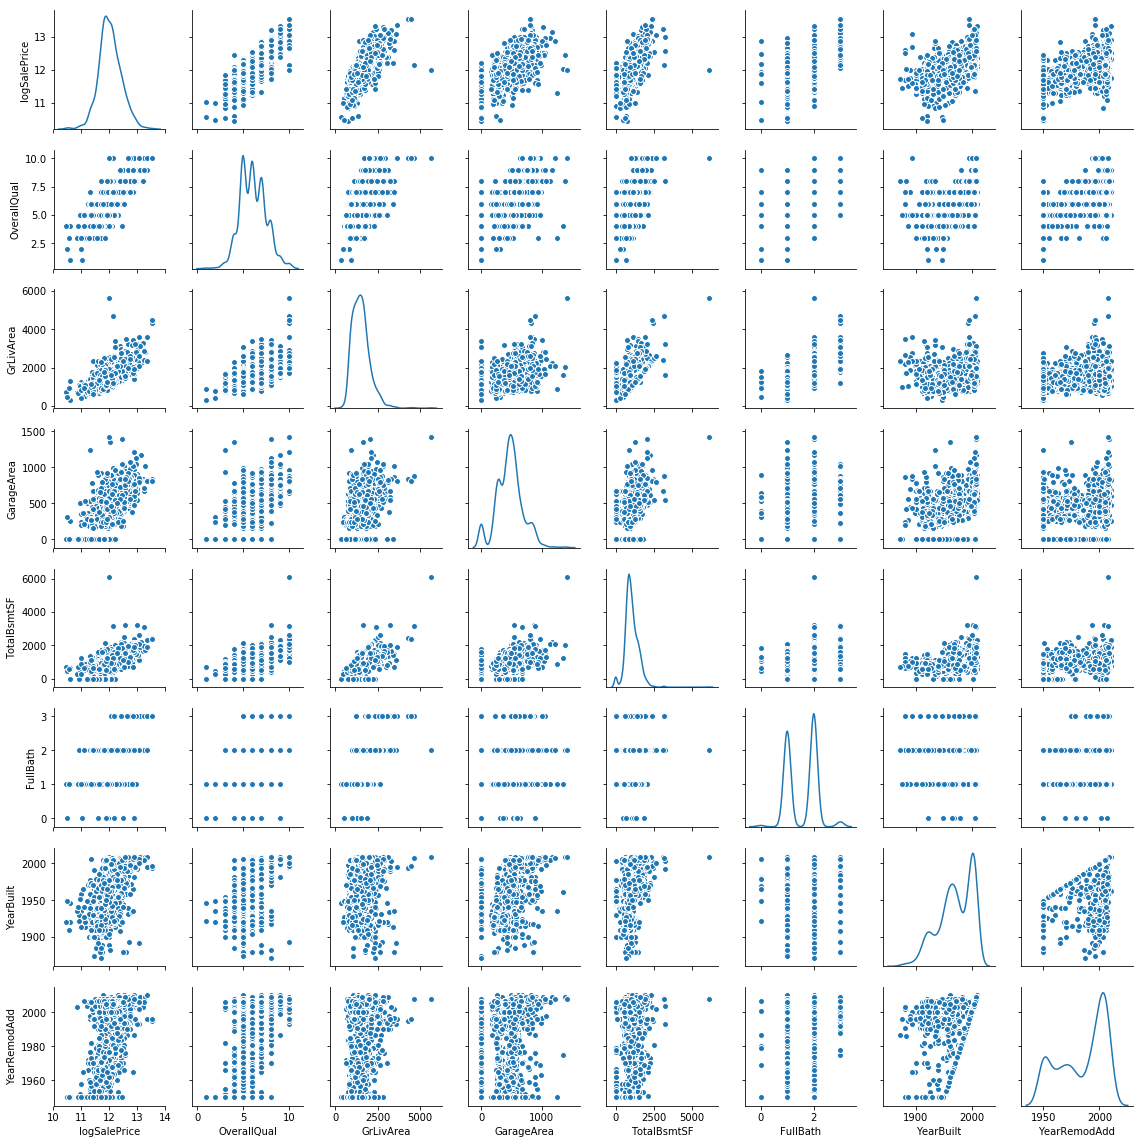

In [44]:
sns.pairplot(data[new_cols_log],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Видим, что многие графики приняли более линейную форму (например цена и OverallQuall).

### Промежуточные выводы

* Например, мы видим как связаны переменные 'TotalBsmtSF' и 'GrLiveArea'. Мы можем увидеть диагональ, которая как бы делить область координат на секторы, и все наблюдения сконцетрированы ниже нее. Это логично, потому что мы ожидаем, что площадь подвального помещения будет меньше или равна площади дома.

* Если посмострим на взаимосзвять 'SalePrice' и 'YearBuilt', то увидим, что отношения между ними экспоненциальные - в последние годы цены растут быстрее по отношению к прошедшим годам. Кстати, это одна из причин, почему коэффициент корреляции Пирсона был невысокий - эта связь не линейная.


## Попарные графики рассеяния для непрерывных переменных

Кроме того как пользоваться сетками графиков из seaborn, мы можем построить графики вручную. Например, графики рассеяния с линейным трендом.

По-хорошему, графики рассеяния должны использоваться, когда обе переменные непрерывны. Сейчас мы построим такие графики для всех наших переменных, показавших самую высокую корреляцию с ценой, а потом посмотрим, как удачнее анализировать случаи, когда одна из переменных - категориальная.

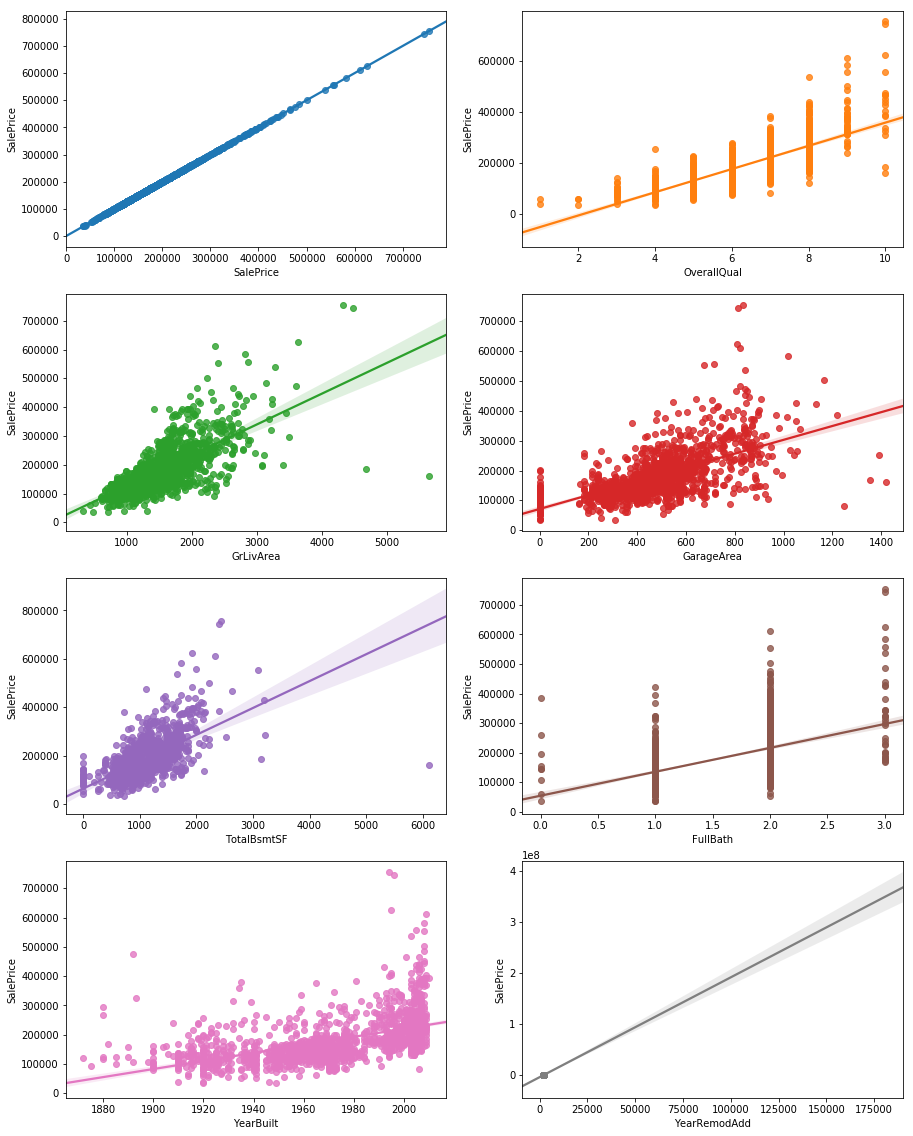

In [45]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
ax_lst = [ax[0][0], ax[0][1], ax[1][0], ax[1][1], ax[2][0], ax[2][1], ax[3][0], ax[3][1]]
for col,ax_i in zip(new_cols,ax_lst):
    sns.regplot(x = col, y = 'SalePrice', data = data, scatter = True, fit_reg = True, ax = ax_i)


По неведомым причинам ломается последний график, но давайте пока выведем его отдельно.

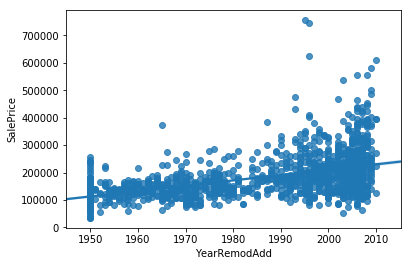

In [46]:
sns.regplot(x = 'YearRemodAdd', y = 'SalePrice', data = data, scatter = True, fit_reg = True)

В таком приближенном рассмотреннии уже, например, хорошо заметны выбросы. Например, в переменной TotalBsmt одна точка в правом нижнем углу тянет тренд на себя.

Ниже пример, как может измениться тренд после удаления выбросов

![](https://cdn-images-1.medium.com/max/800/0*_SHBO9KupWceAJsa.)

**Что делать с выбросами?**

*Винсоризация Winsorizing*

Приравнивание выбросов к какому-то значению (например, к минимальному значению пятой перцентили).

*Логарифмическая трансформация*

По сути во время лог-трансформации снижается вариативность данных. Часто используется для экспоненциальных или скошенных распределений.

*Категоризация (binning)*

Разбивка непрерывной переменной на группы (по сути, преобразованию ее в порядковую).

*Удаление выбросов*

Обычно к удалению мы прибегаем в последнюю очерень, но если у нас очень много наблюдений и очень незначительное количество выбросов, то оно может нас устроить.

## Попарные ящики с усами для категориальных переменных

В том случае, если одна из наших переменных категориальная, а вторая непрервыная, лучше использовать ящики с усами или скрипичные графики, чтобы сравнить распределения непрерывной переменной внутри категорий.

[Подробнее про ящик с усами](https://datavizcatalogue.com/RU/metody/diagramma_razmaha.html)

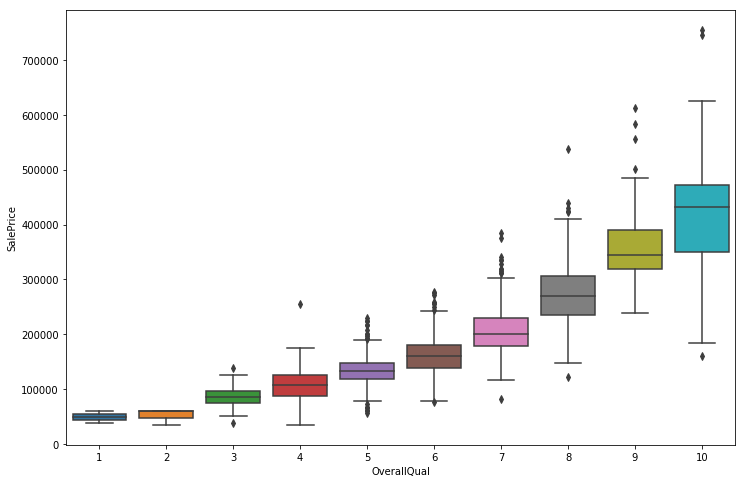

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='OverallQual', y="SalePrice", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

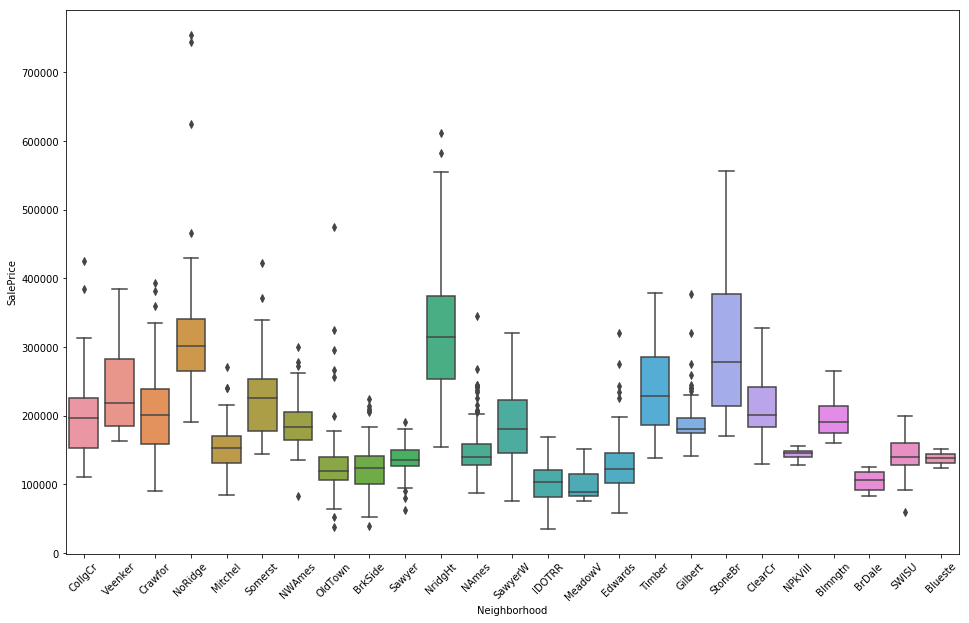

In [48]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=data)
plt.xticks(rotation=45)

Кстати, чтобы оценить распределение категориальной переменной, мы обычно используем бар-чарт, который показывает, сколько наблюдений попадает в каждую категорию.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

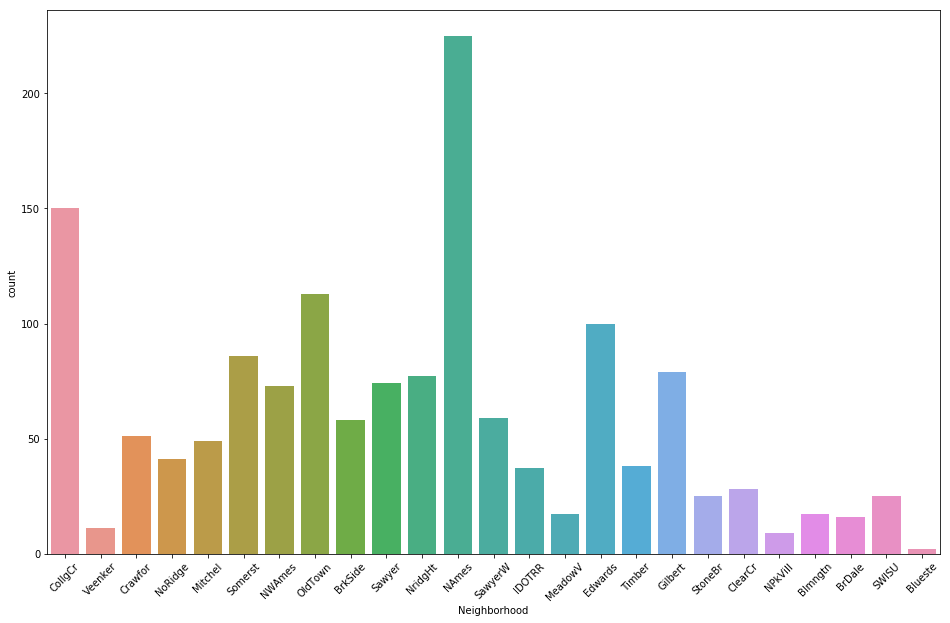

In [49]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.countplot(x='Neighborhood', data=data)
plt.xticks(rotation=45)

Мы видим, что у нас есть несколько райнов с похожими ценами. Это, например, можно использовать для снижения размерности - объединять переменную Neighborhood в более крупные категории.

Мы поработали уже с наши количественными переменными, теперь построим графики для наших категориальных переменных.

In [50]:
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [51]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

Есть переменные с достаточно большим количеством пропущенных значений. Давайте их обработаем.

Обработаем пропущенные данные.

In [52]:
for c in categorical_features:
    data[c] = data[c].astype('category') # приводим к типу данных "категория"
    if data[c].isnull().any(): # проверяем, есть ли пропущенные значения
        data[c] = data[c].cat.add_categories(['MISSING']) # добавляем категорию 
        data[c] = data[c].fillna('MISSING') # заполняем пропущенные значения

In [53]:
data['Alley'].value_counts()

MISSING    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

Для удобства преобразуем данные. Формат melt это по сути unpivot table (мы разворачиваем суммаризирующую таблицу в длинный формат).

In [54]:
data_melted = pd.melt(data, id_vars=['SalePrice'], value_vars=categorical_features)
data_melted.head()

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


Теперь нам нужно построить много-много ящиков с усами. Для этого давайте зададим функцию boxplot, которая будет строить ящики с усами и переворачивать метки на 90 градусов. Так же мы передаем ей аргумент kwargs, который сможет обрабатывать словарь в качестве аргумента (у функции sns.boxplot есть параметры по умолчанию, которые принимают данные в виде словаря, и без kwargs наша функция сломается).

Дальше строим фасетную сетку - по сути мы передаем seaborn данные и говорим, что каждый новый график - это новое значение переменной. В ряду две колонки. Оси x и y - не общие. Сохраняем эту сетку в переменную.

Дальше в эту переменную маппируем нашу функцию, которой в качестве аргументов передаем колонку value по x и SalePrice по y.

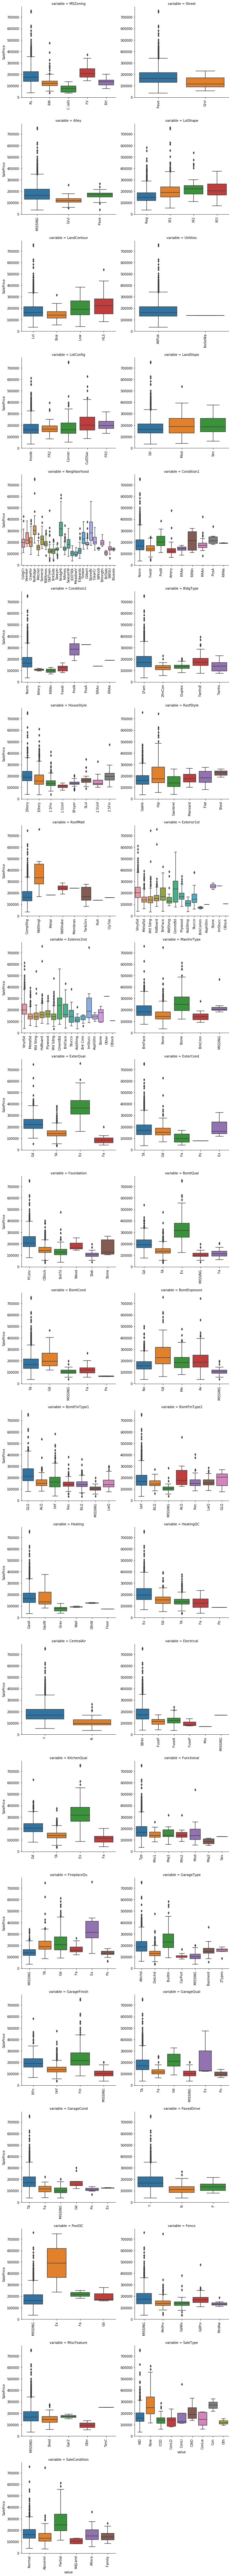

In [93]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
g = sns.FacetGrid(data_melted, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g.map(boxplot, "value", "SalePrice")

Таким образом мы теперь можем изучать зависимость цены от категориальных переменных. Здесь в основном идет речь про создание новых признаков за счет выделения в отдельные переменные категорий, которые значительно отличаются от других (например, деревянные крыши). Или уменьшение размерности внутри категорий, а также работа с выбросами.

## Дополнительные материалы
Также существуют специальные библиотеки для EDA. Например, pandas_profiling. Ее нет в стандартном наборе Анаконды, но ее легко установить через pip. 
[Статья на хабре](https://habr.com/ru/company/ruvds/blog/451478/)